In [1]:
import numpy as np
import matplotlib.pyplot as plt                 # library for plotting the graphs


In [2]:
x = np.linspace(-5,5,100)

In [3]:
y = x**2 # - 4*x - 2

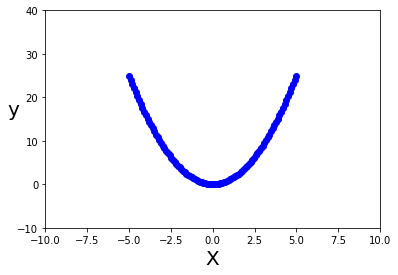

In [4]:
plt.plot(x,y,'bo')
plt.xlabel('X', fontsize = 20)
plt.ylabel('y', fontsize = 20, rotation = 0)
# plt.xlim((-10,10))
# plt.ylim(0,40)
plt.axis([-10,10,-10,40])
plt.show()

In [5]:
np.random.seed(42)
x = 2 * np.random.rand(100,1)

In [6]:
y = 4 + 3 * x

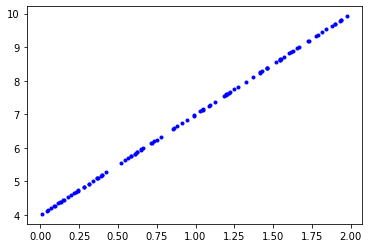

In [7]:
plt.plot(x,y,'b.')
plt.show()

In [8]:
np.random.seed(42)
y = 4 + 3*x + np.random.randn(100,1)            # added gaussian noise

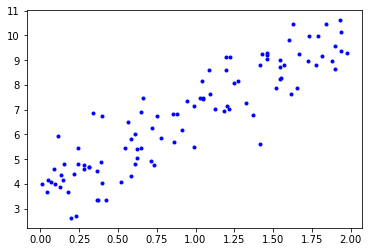

In [9]:
plt.plot(x,y,'b.')
plt.show()

In [10]:
x_b = np.c_[np.ones((100,1)),x]

In [11]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [12]:
theta_best

array([[3.70655768],
       [3.20162012]])

In [13]:
x_new = np.array([[0.],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.70655768],
       [10.10979793]])

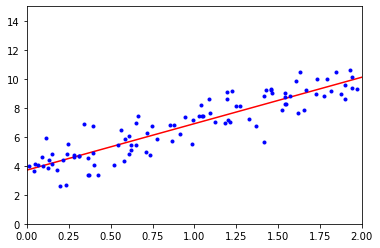

In [14]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

# Batch Gradient Descent

In [17]:
eta = 0.1
theta = np.random.rand(2,1)
n_iterations = 1000
m = len(x)

for i in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - eta* gradients

In [18]:
theta

array([[3.70655768],
       [3.20162012]])

In [35]:
def gradirnt_descent(eta):
    theta = np.random.rand(2,1)
    n_iterations = 1000
    m = len(x)

    for i in range(n_iterations):
        gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
        theta = theta - eta* gradients
        
        if i<10:
            style = 'b-' if i>0 else 'r--'
            y_pred = x_new_b.dot(theta)
            plt.plot(x_new, y_pred, style)
    
    plt.plot(x,y,'b.')
    plt.axis([0,2,0,15])
    plt.xlabel('X',fontsize = 20)
    plt.ylabel('y', rotation = 0, fontsize = 20)
    plt.title(f'eta={eta}' )

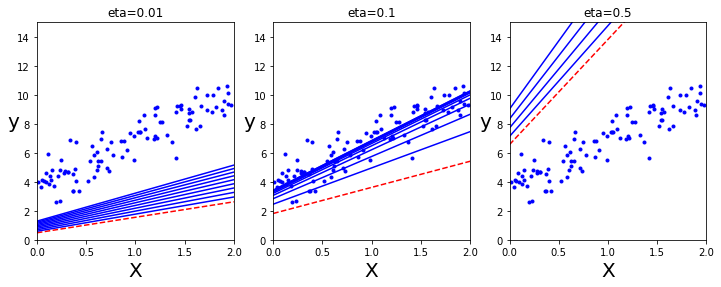

In [41]:
np.random.seed(42)
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
gradirnt_descent(0.01)
plt.subplot(1,3,2)
gradirnt_descent(0.1)
plt.subplot(1,3,3)
gradirnt_descent(0.5)
plt.show()